In [19]:
!pip3 install pymongo

import pymongo
from pymongo import MongoClient
# !pip3 install pymongo
import datetime

In [20]:
client = MongoClient('40.82.211.185',27000, username = "admin", password = "abc123")

client.server_info()

{'version': '7.0.1',
 'gitVersion': '425a0454d12f2664f9e31002bbe4a386a25345b5',
 'modules': [],
 'allocator': 'tcmalloc',
 'javascriptEngine': 'mozjs',
 'sysInfo': 'deprecated',
 'versionArray': [7, 0, 1, 0],
 'openssl': {'running': 'OpenSSL 1.1.1f  31 Mar 2020',
  'compiled': 'OpenSSL 1.1.1f  31 Mar 2020'},
 'buildEnvironment': {'distmod': 'ubuntu2004',
  'distarch': 'x86_64',
  'cc': '/opt/mongodbtoolchain/v4/bin/gcc: gcc (GCC) 11.3.0',
  'ccflags': '-Werror -include mongo/platform/basic.h -ffp-contract=off -fasynchronous-unwind-tables -g2 -Wall -Wsign-compare -Wno-unknown-pragmas -Winvalid-pch -gdwarf-5 -fno-omit-frame-pointer -fno-strict-aliasing -O2 -march=sandybridge -mtune=generic -mprefer-vector-width=128 -Wno-unused-local-typedefs -Wno-unused-function -Wno-deprecated-declarations -Wno-unused-const-variable -Wno-unused-but-set-variable -Wno-missing-braces -fstack-protector-strong -gdwarf64 -Wa,--nocompress-debug-sections -fno-builtin-memcmp -Wimplicit-fallthrough=5',
  'cxx': '

In [21]:
db = client['bdm']
collection = db['qld_data']

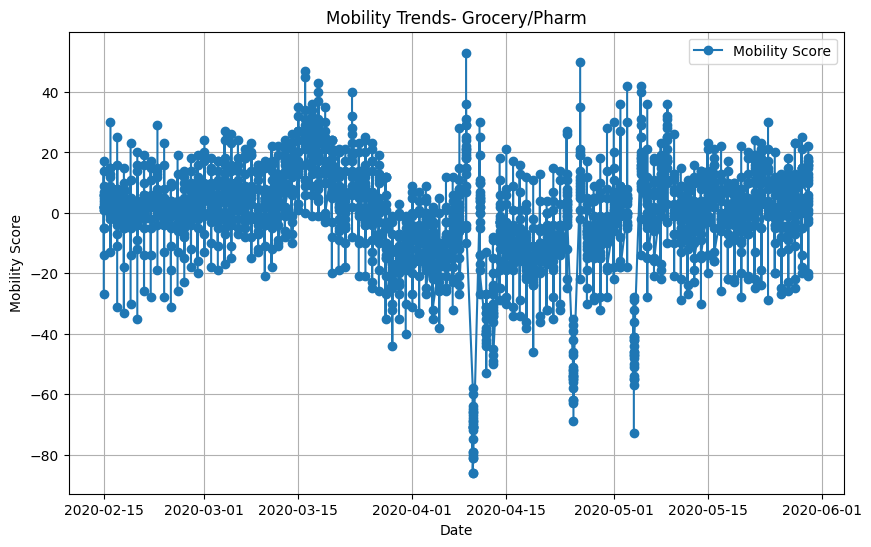

In [22]:
import pymongo
import matplotlib.pyplot as plt
from datetime import datetime

db = client['bdm']
collection = db['qld_data']

start_date = datetime(2020, 2, 15)
end_date = datetime(2020, 5, 30)

# Query MongoDB for data within the date range
query_mobility = {"date": {"$gte": start_date, "$lte": end_date}}

phases = [
    {"name": "Phase 1", "start_date": "2020-03-01", "end_date": "2020-08-20"},
]

# Analysis for each phase
for phase in phases:
    mobility_data = list(collection.find(query_mobility))

    mobility_data.sort(key=lambda x: x["date"])
    dates = [entry["date"] for entry in mobility_data]
    mobility_scores = [entry["grocery_and_pharmacy_percent_change_from_baseline"] for entry in mobility_data]

    plt.figure(figsize=(10, 6))
    plt.plot(dates, mobility_scores, label="Mobility Score", marker='o')
    plt.title(f"Mobility Trends- Grocery/Pharm")
    plt.xlabel("Date")
    plt.ylabel("Mobility Score")
    plt.legend()
    plt.grid(True)
    plt.show()



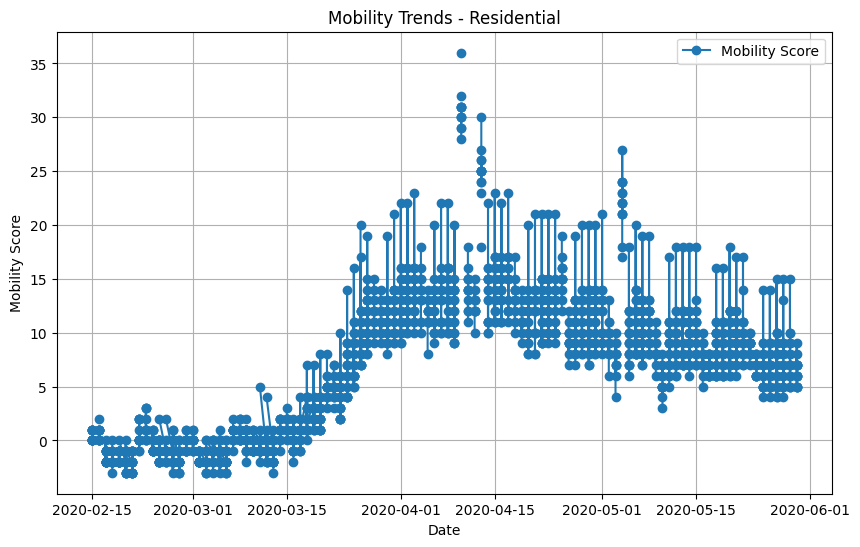

In [23]:
start_date = datetime(2020, 2, 15)
end_date = datetime(2020, 5, 30)

regions = ["Queensland"]  # Replace with actual region names

for region in regions:
    query_region = {"date": {"$gte": start_date, "$lte": end_date}, "sub_region_1": region}
    mobility_data = list(collection.find(query_region))

    if len(mobility_data) > 0:
        mobility_data.sort(key=lambda x: x["date"])
        dates = [entry["date"] for entry in mobility_data]
        mobility_scores = [entry["residential_percent_change_from_baseline"] for entry in mobility_data]

        plt.figure(figsize=(10, 6))
        plt.plot(dates, mobility_scores, label="Mobility Score", marker='o')
        plt.title(f"Mobility Trends - Residential")
        plt.xlabel("Date")
        plt.ylabel("Mobility Score")
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print(f"No data found for {region}")


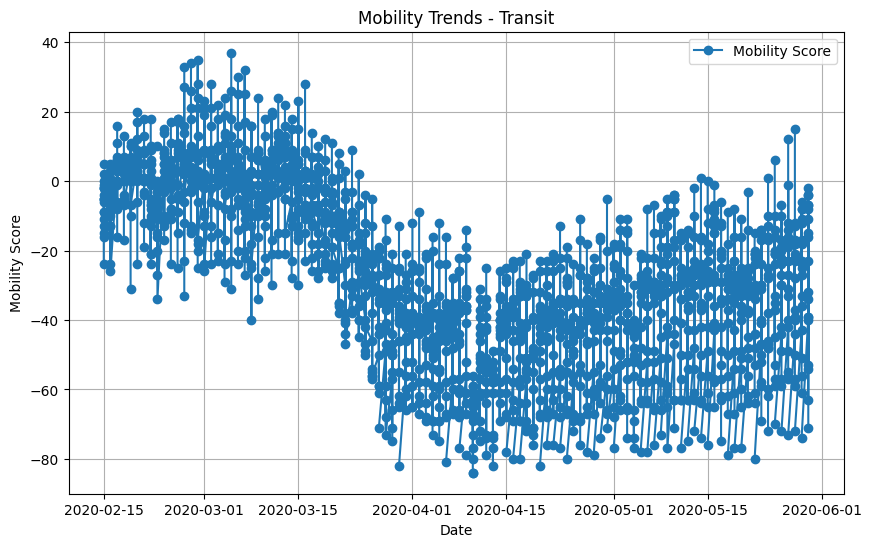

In [24]:
start_date = datetime(2020, 2, 15)
end_date = datetime(2020, 5, 30)

regions = ["Queensland"]  # Replace with actual region names

for region in regions:
    query_region = {"date": {"$gte": start_date, "$lte": end_date}, "sub_region_1": region}
    mobility_data = list(collection.find(query_region))

    if len(mobility_data) > 0:
        mobility_data.sort(key=lambda x: x["date"])
        dates = [entry["date"] for entry in mobility_data]
        mobility_scores = [entry["transit_stations_percent_change_from_baseline"] for entry in mobility_data]

        plt.figure(figsize=(10, 6))
        plt.plot(dates, mobility_scores, label="Mobility Score", marker='o')
        plt.title(f"Mobility Trends - Transit")
        plt.xlabel("Date")
        plt.ylabel("Mobility Score")
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print(f"No data found for {region}")


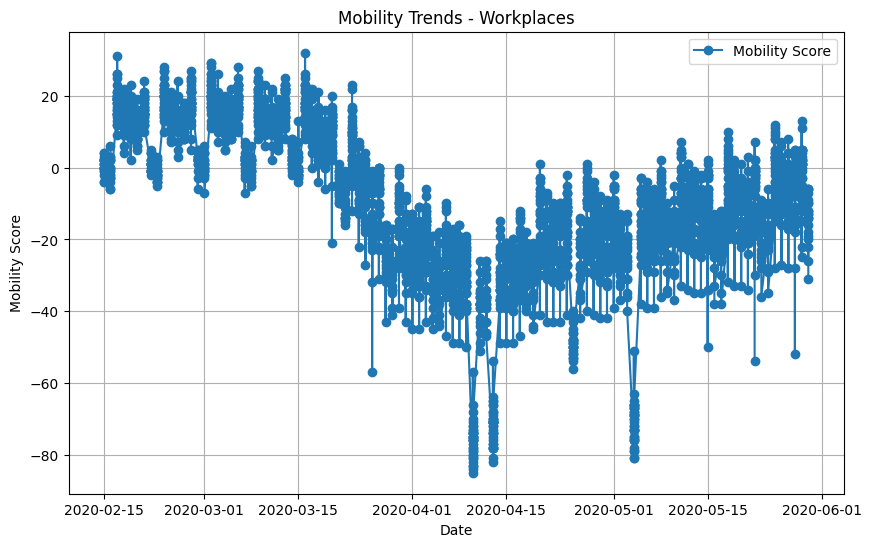

In [25]:
start_date = datetime(2020, 2, 15)
end_date = datetime(2020, 5, 30)

regions = ["Queensland"]  # Replace with actual region names

for region in regions:
    query_region = {"date": {"$gte": start_date, "$lte": end_date}, "sub_region_1": region}
    mobility_data = list(collection.find(query_region))

    if len(mobility_data) > 0:
        mobility_data.sort(key=lambda x: x["date"])
        dates = [entry["date"] for entry in mobility_data]
        mobility_scores = [entry["workplaces_percent_change_from_baseline"] for entry in mobility_data]

        plt.figure(figsize=(10, 6))
        plt.plot(dates, mobility_scores, label="Mobility Score", marker='o')
        plt.title(f"Mobility Trends - Workplaces")
        plt.xlabel("Date")
        plt.ylabel("Mobility Score")
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print(f"No data found for {region}")


<ipython-input-26-b1398c8d2f9c>:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby("date").mean().reset_index()


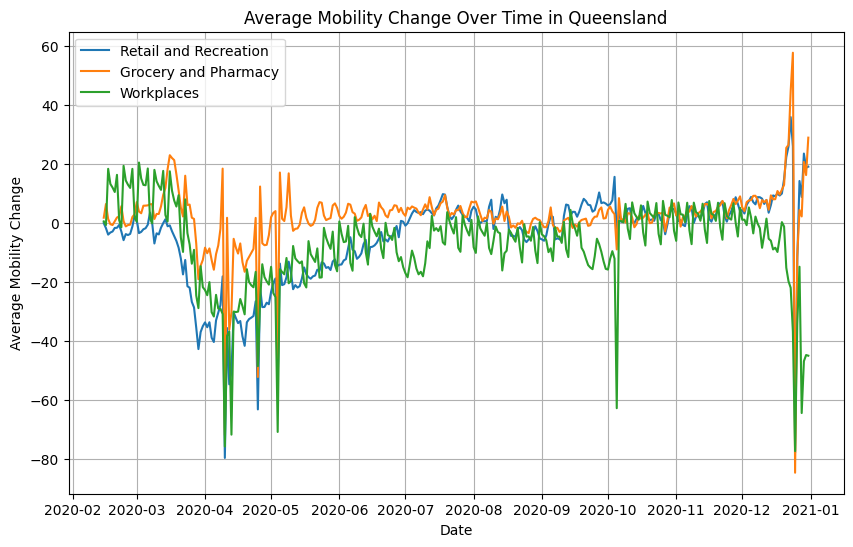

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

target_region = "Queensland"  # Replace with the desired region

# Query MongoDB for data for the specified region
query_region = {"sub_region_1": target_region}
projection = {
    "date": 1,
    "retail_and_recreation_percent_change_from_baseline": 1,
    "grocery_and_pharmacy_percent_change_from_baseline": 1,
    "workplaces_percent_change_from_baseline": 1
}

cursor = collection.find(query_region, projection)
data = list(cursor)

if data:
    df = pd.DataFrame(data)

    # Group data by date and calculate the average mobility change for each category
    df_grouped = df.groupby("date").mean().reset_index()

    # Plot the average mobility change over time
    plt.figure(figsize=(10, 6))
    plt.plot(df_grouped["date"], df_grouped["retail_and_recreation_percent_change_from_baseline"], label="Retail and Recreation")
    plt.plot(df_grouped["date"], df_grouped["grocery_and_pharmacy_percent_change_from_baseline"], label="Grocery and Pharmacy")
    plt.plot(df_grouped["date"], df_grouped["workplaces_percent_change_from_baseline"], label="Workplaces")
    plt.xlabel("Date")
    plt.ylabel("Average Mobility Change")
    plt.title(f"Average Mobility Change Over Time in {target_region}")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print(f"No data found for {target_region}")


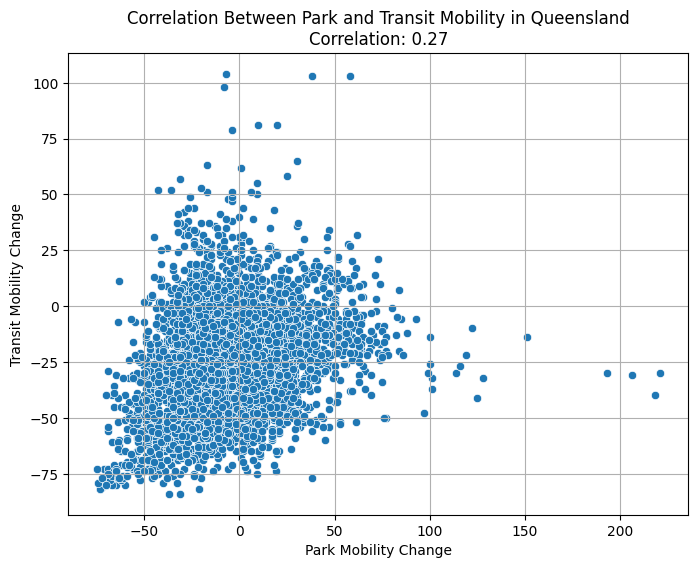

In [9]:
import seaborn as sns

target_region = "Queensland"  # Replace with the desired region

# Query MongoDB for data for the specified region
query_region = {"sub_region_1": target_region}
projection = {
    "parks_percent_change_from_baseline": 1,
    "transit_stations_percent_change_from_baseline": 1
}

cursor = collection.find(query_region, projection)
data = list(cursor)

if data:
    df = pd.DataFrame(data)

    # Calculate the correlation between residential and retail/recreation mobility changes
    correlation = df["parks_percent_change_from_baseline"].corr(df["transit_stations_percent_change_from_baseline"])

    # Create a scatter plot to visualize the relationship
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x="parks_percent_change_from_baseline", y="transit_stations_percent_change_from_baseline", data=df)
    plt.xlabel("Park Mobility Change")
    plt.ylabel("Transit Mobility Change")
    plt.title(f"Correlation Between Park and Transit Mobility in {target_region}\nCorrelation: {correlation:.2f}")
    plt.grid(True)
    plt.show()
else:
    print(f"No data found for {target_region}")


<ipython-input-10-1432f1023a77>:28: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby("weekend").mean().reset_index()


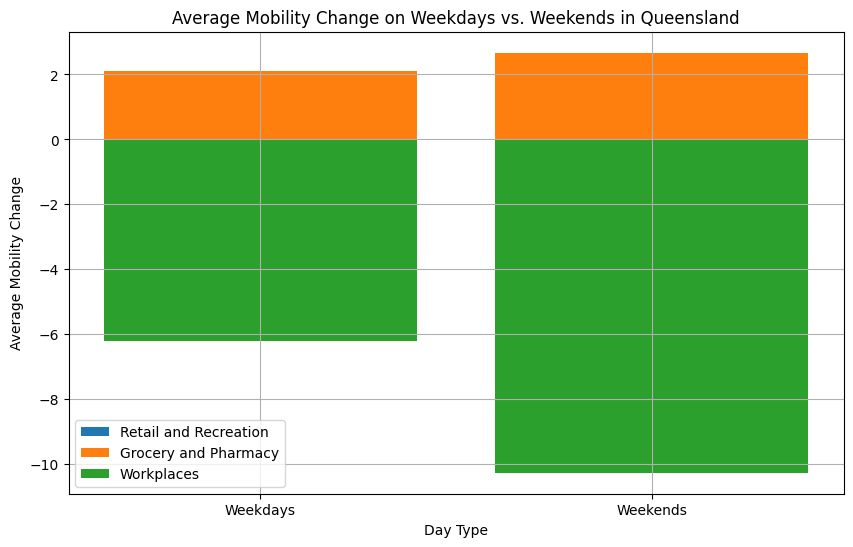

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

target_region = "Queensland"  # Replace with the desired region

# Query MongoDB for data for the specified region
query_region = {"sub_region_1": target_region}
projection = {
    "date": 1,
    "retail_and_recreation_percent_change_from_baseline": 1,
    "grocery_and_pharmacy_percent_change_from_baseline": 1,
    "workplaces_percent_change_from_baseline": 1
}

cursor = collection.find(query_region, projection)
data = list(cursor)

if data:
    df = pd.DataFrame(data)

    # Convert the "date" column to datetime
    df["date"] = pd.to_datetime(df["date"])

    # Create a new column to identify weekdays (0) and weekends (1)
    df["weekend"] = df["date"].dt.weekday // 5  # 0 for weekdays, 1 for weekends

    # Group data by weekends and weekdays and calculate the average mobility change for each category
    df_grouped = df.groupby("weekend").mean().reset_index()

    # Plot the average mobility change for each category on weekdays and weekends
    plt.figure(figsize=(10, 6))
    plt.bar(["Weekdays", "Weekends"], df_grouped["retail_and_recreation_percent_change_from_baseline"], label="Retail and Recreation")
    plt.bar(["Weekdays", "Weekends"], df_grouped["grocery_and_pharmacy_percent_change_from_baseline"], label="Grocery and Pharmacy")
    plt.bar(["Weekdays", "Weekends"], df_grouped["workplaces_percent_change_from_baseline"], label="Workplaces")
    plt.xlabel("Day Type")
    plt.ylabel("Average Mobility Change")
    plt.title(f"Average Mobility Change on Weekdays vs. Weekends in {target_region}")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print(f"No data found for {target_region}")


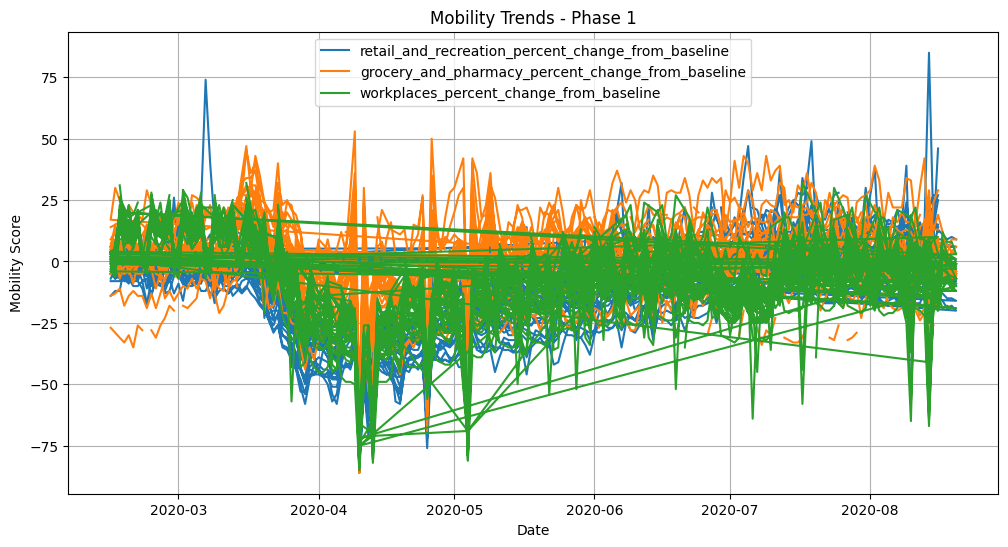

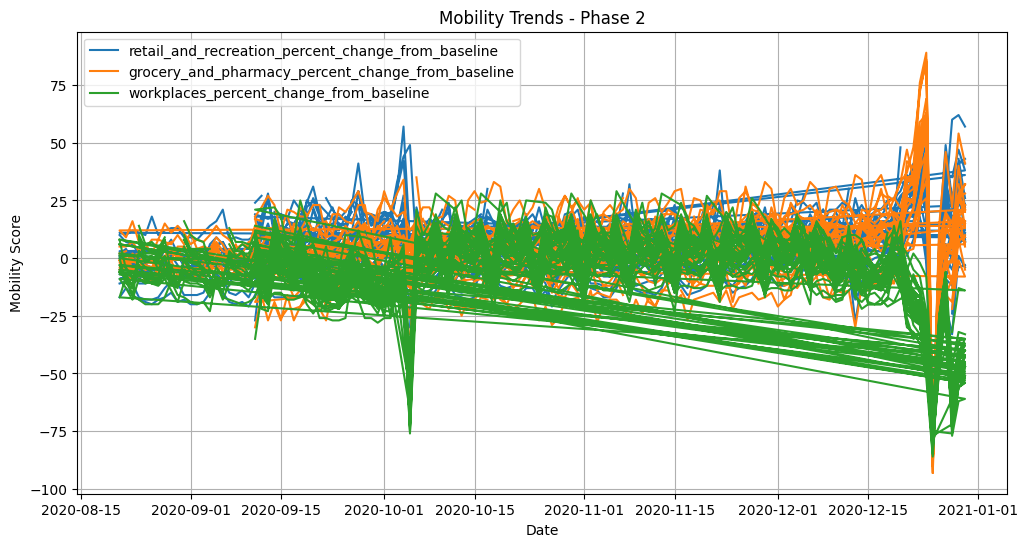

In [17]:
import pymongo
import matplotlib.pyplot as plt
from datetime import datetime

# Define the phases (start_date and end_date)
phases = [
    {"name": "Phase 1", "start_date": "2020-02-01", "end_date": "2020-08-20"},
    {"name": "Phase 2", "start_date": "2020-08-21", "end_date": "2020-12-30"},
    # Add more phases as needed
]

# Define mobility categories you want to analyze
mobility_categories = [
    "retail_and_recreation_percent_change_from_baseline",
    "grocery_and_pharmacy_percent_change_from_baseline",
    "workplaces_percent_change_from_baseline"
    # Add more mobility categories as needed
]

# Iterate through each phase
for phase in phases:
    phase_start_date = datetime.strptime(phase["start_date"], "%Y-%m-%d")
    phase_end_date = datetime.strptime(phase["end_date"], "%Y-%m-%d")

    # Query MongoDB for data within the current phase
    query = {
        "date": {"$gte": phase_start_date, "$lte": phase_end_date}
    }

    # Retrieve mobility data for the current phase
    phase_mobility_data = list(collection.find(query))

    if not phase_mobility_data:
        print(f"No data available for {phase['name']}")
        continue

    # Create a plot for each mobility category
    plt.figure(figsize=(12, 6))
    for category in mobility_categories:
        mobility_scores = [entry[category] for entry in phase_mobility_data]
        dates = [entry["date"] for entry in phase_mobility_data]
        plt.plot(dates, mobility_scores, label=category)

    plt.title(f"Mobility Trends - {phase['name']}")
    plt.xlabel("Date")
    plt.ylabel("Mobility Score")
    plt.legend()
    plt.grid(True)
    plt.show()
